# Lecture 7

* Slicing numpy arrays (again)
* Visualizing images (again)
* Histograms

In [ ]:
# as always:
import numpy as np

In [ ]:
X = np.array([0,1,2,3])
Y = X[0:2]
print( "X, Y: ", X, Y)
Y[0] = 999
print("X, Y: ", X, Y)

For numpy arrays, slicing makes a reference to that part of the array (called a 'view' onto the array in `numpy` parlance). This makes sense because if we have some huge dataset, we do not want to copy the whole dataset when we just want to look at a slice of it. If we want to slicing an array without making a reference, we can use `copy` function first.

In [ ]:
np.copy()

In [ ]:
X = np.array([0,1,2,3])
Y = X.copy()[0:2]
print( "X, Y: ", X, Y)
Y[0] = 999
print("X, Y: ", X, Y)

# Visualizing images (again)

Let's read in an image: 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# download 'gauss.jpg' from the canvas page
# you may need to execute 'conda install Pillow' at the Anaconda prompt 
# to be able to use 'imread' on a jpg
G = plt.imread("gauss.jpg")

The image consists of 765 rows, 600 columns, and three RGB channels, i.e. there are three 765 X 600 arrays, one for each of the three colors red, green and blue: 

In [7]:
type(G)

numpy.ndarray

In [8]:
G.shape

(765, 600, 3)

Let's use `imshow` again to visualize the image: 

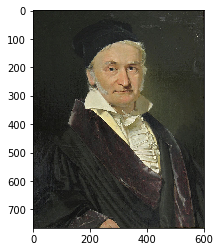

In [9]:
plt.imshow(G)
plt.show()

As expected, the image is colored. To make it grayscale, we can average out the three colors for each pixel:

In [10]:
# this is the same with np.apply_along_axis
G_bw = np.mean(G, axis=2)

As expected, this reduces the dimensionality of the array, from 3D to 2D: 

In [11]:
G_bw.shape

(765, 600)

The argument `cmap` can be:  
> 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

or MATLAB style
> 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper'
          
For more please refer to [https://matplotlib.org/tutorials/colors/colormaps.html](https://matplotlib.org/tutorials/colors/colormaps.html)

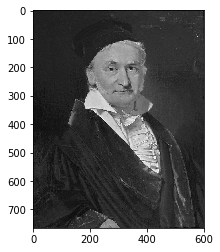

In [12]:
plt.imshow(G_bw, cmap="gray")

# Histograms 

Suppose we want to see how much of each shade of gray there is in the above picture. One way to do this is to look at a histogram. 

First, let's look at the data:

In [ ]:
print(G_bw[:5,:5])

In [ ]:
G_bw.shape

But to create the histogram, we need to 'flatten' these data into a 1D array: 

In [15]:
G_bw_1D = G_bw.reshape(-1)   # if you put -1, it figures out what the shape should be
G_bw_1D.shape

(459000,)

### Normalization
Finally, we don't particularly care about the actual intensity values that the pixels assume. All we care about is how those values are distributed between the maximum and minimum intensities. 

We therefore choose to **normalize** the data in such a way that the min is 0, the max is 1, and everything else is in between:

In [16]:
G_bw_1D = G_bw_1D - np.min(G_bw_1D)
G_bw_1D = G_bw_1D / np.max(G_bw_1D)
print(G_bw_1D[0:20])

[0.08411215 0.09612817 0.10413885 0.10413885 0.09612817 0.09212283
 0.10413885 0.11615487 0.12416555 0.12016021 0.11615487 0.11615487
 0.11214953 0.11615487 0.11615487 0.11615487 0.10413885 0.09212283
 0.08811749 0.09612817]


Finally, we are ready to plot our histogram: 

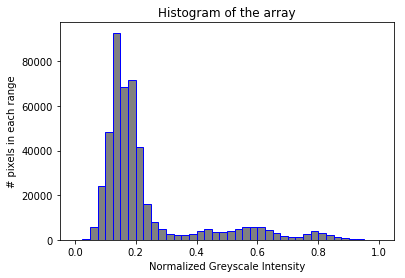

In [20]:
plt.hist(G_bw_1D, bins=40, facecolor='gray', edgecolor='blue')
plt.xlabel('Normalized Greyscale Intensity')
plt.ylabel('# pixels in each range')
plt.title("Histogram of the array")
plt.show()

## In-class exercise: different normalization for different channels

In the histogram above, we normalized the data using its max and min values. Instead we can use **$L^2$-normalization**.
<br><br>
For any vector $\mathbf{v} = (v_1,\dots,v_n)^T\in \mathbb{R}^n$ we normalize this vector by $\mathbf{v}/\|\mathbf{v}\|_2$:
$$ \widetilde{\mathbf{v}} = \frac{1}{\sqrt{\sum_{i=1}^n v_i^2 }} \begin{pmatrix} v_1 \\
v_2 \\ \vdots \\ v_n\end{pmatrix}$$
It can be verified that 
$$\left\|\widetilde{\mathbf{v}} \right\| = 1, \quad \text{ and }\quad  0\leq \tilde{v}_i \leq 1.$$
Instead of using the `apply_along_axis` or `mean` along certain axis to suppress the image to greyscale, let us consider the red channel first.

Tool to use: either implement the norm computation by hand, or you can use the [`norm` function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html) in the `numpy.linalg` submodule.

In [ ]:
G_rd = G[:,:,0]
G_rd.shape

In [ ]:
plt.imshow(G_rd, cmap="Reds")

In [ ]:
G_rd_1D = G_rd.reshape(-1)

In [ ]:
# to compute G_rd_1D's L2 norm
import numpy.linalg as LA
# G_rd_1D = ???

In [ ]:
plt.hist(G_rd_1D, bins=40, facecolor='red', edgecolor='black')
plt.xlabel('Normalized Red Intensity')
plt.ylabel('# pixels in each range')
plt.title("Histogram of the red")

## Try $L^2$ normalization for green and blue channels
Some starter codes are as follows.
```python
G_green = G[:,:,1] # green channel
G_blue = G[:,:,2] # blue channel

# use the corresponding color to show the green and blue channels
plt.imshow(G_green, cmap="Greens")
plt.imshow(G_blue, cmap="Blues")
```